In [ ]:
import pandas as pd
new_df = pd.read_csv('/home/jupyter-dowonkim/parler/new_df.csv')

In [ ]:
df = new_df  # copy 

In [11]:

# Calculate rates for each emotion
df['anger_rate'] = df['anger'] * 100
df['disgust_rate'] = df['disgust'] * 100
df['fear_rate'] = df['fear'] * 100
df['joy_rate'] = df['joy'] * 100
df['neutral_rate'] = df['neutral'] * 100
df['sadness_rate'] = df['sadness'] * 100
df['surprise_rate'] = df['surprise'] * 100

# Calculate negative rate
df['negative_rate'] = (df['anger'] + df['disgust'] + df['fear'] + df['sadness']) * 100

# Select relevant columns for correlation analysis
correlation_columns = [
    'anger_rate', 'disgust_rate', 'fear_rate', 'joy_rate', 'neutral_rate', 'sadness_rate', 
    'surprise_rate', 'negative_rate', 'upvotes', 'impressions', 'reposts'
]

# Calculate correlation matrix
correlation_matrix = df[correlation_columns].corr()

# Display correlation matrix
correlation_matrix



,anger_rate,disgust_rate,fear_rate,joy_rate,neutral_rate,sadness_rate,surprise_rate,negative_rate,upvotes,impressions,reposts
anger_rate,1.000000,-0.027755,-0.340326,-0.173089,-0.298515,-0.146303,-0.152760,0.364146,-0.010277,-0.022108,-0.008332
disgust_rate,-0.027755,1.000000,-0.335390,-0.130128,-0.076109,-0.094360,-0.093577,0.146148,0.017812,0.003753,0.021749
fear_rate,-0.340326,-0.335390,1.000000,-0.158055,-0.449914,-0.241485,-0.233590,0.511762,0.021223,0.008824,0.027928
joy_rate,-0.173089,-0.130128,-0.158055,1.000000,0.036800,-0.036346,0.039582,-0.418172,-0.007464,0.005471,-0.014046
neutral_rate,-0.298515,-0.076109,-0.449914,0.036800,1.000000,-0.071436,0.045973,-0.836349,-0.014458,0.007003,-0.023404
sadness_rate,-0.146303,-0.094360,-0.241485,-0.036346,-0.071436,1.000000,0.010170,0.067104,-0.004463,0.010951,-0.006565
surprise_rate,-0.152760,-0.093577,-0.233590,0.039582,0.045973,0.010170,1.000000,-0.440071,-0.023259,-0.017854,-0.025169
negative_rate,0.364146,0.146148,0.511762,-0.418172,-0.836349,0.067104,-0.440071,1.000000,0.023452,-0.000744,0.033849
upvotes,-0.010277,0.017812,0.021223,-0.007464,-0.014458,-0.004463,-0.023259,0.023452,1.000000,0.743056,0.966650
impressions,-0.022108,0.003753,0.008824,0.005471,0.007003,0.010951,-0.017854,-0.000744,0.743056,1.000000,0.712209


In [ ]:
# Convert 'createdAtformatted' to datetime
df['createdAtformatted'] = pd.to_datetime(df['createdAtformatted'])

# Extract month and year for aggregation
df['month_year'] = df['createdAtformatted'].dt.to_period('M')

In [ ]:
# Aggregation
monthly_data = df.groupby('month_year').agg(
    total_contents=('createdAtformatted', 'count'),
    # Aggregations for Naive Bayes polarity 
    mean_naive_bayes_polarity=('naive_bayes_polarity', 'mean'),
    # Aggregations for empath variables
    mean_empath_positive=('empath_positive', 'mean'),
    mean_empath_negative=('empath_negative', 'mean'),
    # Aggregations for emotions
    mean_anger=('anger_rate', 'mean'),
    mean_disgust=('disgust_rate', 'mean'),
    mean_fear=('fear_rate', 'mean'),
    mean_joy=('joy_rate', 'mean'),
    mean_neutral=('neutral_rate', 'mean'),
    mean_sadness=('sadness_rate', 'mean'),
    mean_surprise=('surprise_rate', 'mean'),
    mean_negative=('negative_rate', 'mean'),
    # Aggregations for engagement variables
    mean_upvotes=('upvotes', 'mean'),
    mean_impressions=('impressions', 'mean'),
    mean_reposts=('reposts', 'mean'),
)


In [ ]:
monthly_data.columns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index.astype(str), monthly_data['total_contents'], marker='o')
plt.title('Number of Contents Related to #STC Over Time on Parler')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.savefig('/home/jupyter-dowonkim/parler/img/contents_over_time.png')  # 경로와 파일명 지정
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index.astype(str), monthly_data['mean_naive_bayes_polarity'])
plt.title('Mean of Naive Bayes Polarity Over Time')
plt.xlabel('Month')
plt.ylabel('Naive Bayes Polarity')
plt.xticks(rotation=45)
plt.savefig('/home/jupyter-dowonkim/parler/img/naive_bayes_polarity_over_time.png')  # 경로와 파일명 지정
plt.show()

In [ ]:
# Creating a 2x1 subplot
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plotting for empath_positive (Mean and Median)
axs[0].plot(monthly_data.index.astype(str), monthly_data['mean_empath_positive'], marker='o', color='blue', label='Mean Empath Positive')
axs[0].plot(monthly_data.index.astype(str), monthly_data['mean_empath_negative'], marker='x', color='red', label='Mean Empath Negative')
axs[0].set_title('Empath Positive/Negative Over Time')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Empath Score')
axs[0].tick_params(axis='x', rotation=45)
axs[0].legend()

# Plotting for empath_negative (Mean and Median)
axs[1].plot(monthly_data.index.astype(str), monthly_data['mean_naive_bayes_polarity'])
axs[1].set_title('Mean of Naive Bayes Polarity Over Time')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Naive Bayes Polarity')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('/home/jupyter-dowonkim/parler/img/empath_polarity_over_time.png')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming 'monthly_data' is your DataFrame with monthly averages of emotion scores
# and it has a DateTimeIndex or similar

fig, ax = plt.subplots(figsize=(15, 10))

# Define a list of emotions
emotions = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']


# Define a list of markers
markers = ['o', '^', 's', 'p', '*', 'x', 'D']  # Example markers

# Create a colormap for the emotions
cmap = plt.get_cmap('tab10')

# Loop through the emotions and create plots with different markers and colors
for i, emotion in enumerate(emotions):
    color = cmap(i)  # Get a unique color for each emotion
    marker = markers[i]  # Get a unique marker for each emotion
    
    ax.plot(
        monthly_data.index.astype(str), 
        monthly_data[f'mean_{emotion}'], 
        label=emotion.capitalize(),
        marker=marker,
        color=color
    )

# Setting titles and labels
ax.set_title('Emotions Over Time')
ax.set_xlabel('Month')
ax.set_ylabel('Emotion Score')
ax.tick_params(axis='x', rotation=45)

# Adding a legend with distinct colors and markers
ax.legend()

plt.tight_layout()
plt.savefig('/home/jupyter-dowonkim/parler/img/emotions_over_time.png')
plt.show()


In [ ]:
# Creating a 1x3 subplot
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# List of engagement variables
engagement_vars = ['upvotes', 'impressions', 'reposts']

# Loop through the engagement variables and create plots
for i, var in enumerate(engagement_vars):
    axs[i].plot(monthly_data.index.astype(str), monthly_data[f'mean_{var}'], marker='o', label=f'Mean {var.capitalize()}')
   # axs[i].plot(monthly_data.index.astype(str), monthly_data[f'median_{var}'], marker='x', label=f'Median {var.capitalize()}')
    axs[i].set_title(f'{var.capitalize()} Over Time')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel(f'{var.capitalize()}')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend()

plt.tight_layout()

plt.savefig('/home/jupyter-dowonkim/parler/img/engagements_over_time.png')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Selecting relevant columns for the correlation matrix
correlation_data = monthly_data[[
    'mean_upvotes', 'mean_impressions', 'mean_reposts',
    'mean_naive_bayes_polarity', 'mean_empath_positive', 'mean_empath_negative', 
    'mean_anger', 'mean_disgust', 'mean_fear', 
    'mean_joy', 'mean_neutral', 'mean_sadness', 'mean_surprise',
    'mean_negative'
]]
# Calculating the correlation matrix
corr_matrix = correlation_data.corr()

# Creating a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Monthly Aggregated Variables')
plt.savefig('/home/jupyter-dowonkim/parler/img/heatmap_all.png')
plt.show()

In [ ]:
new_df.columns

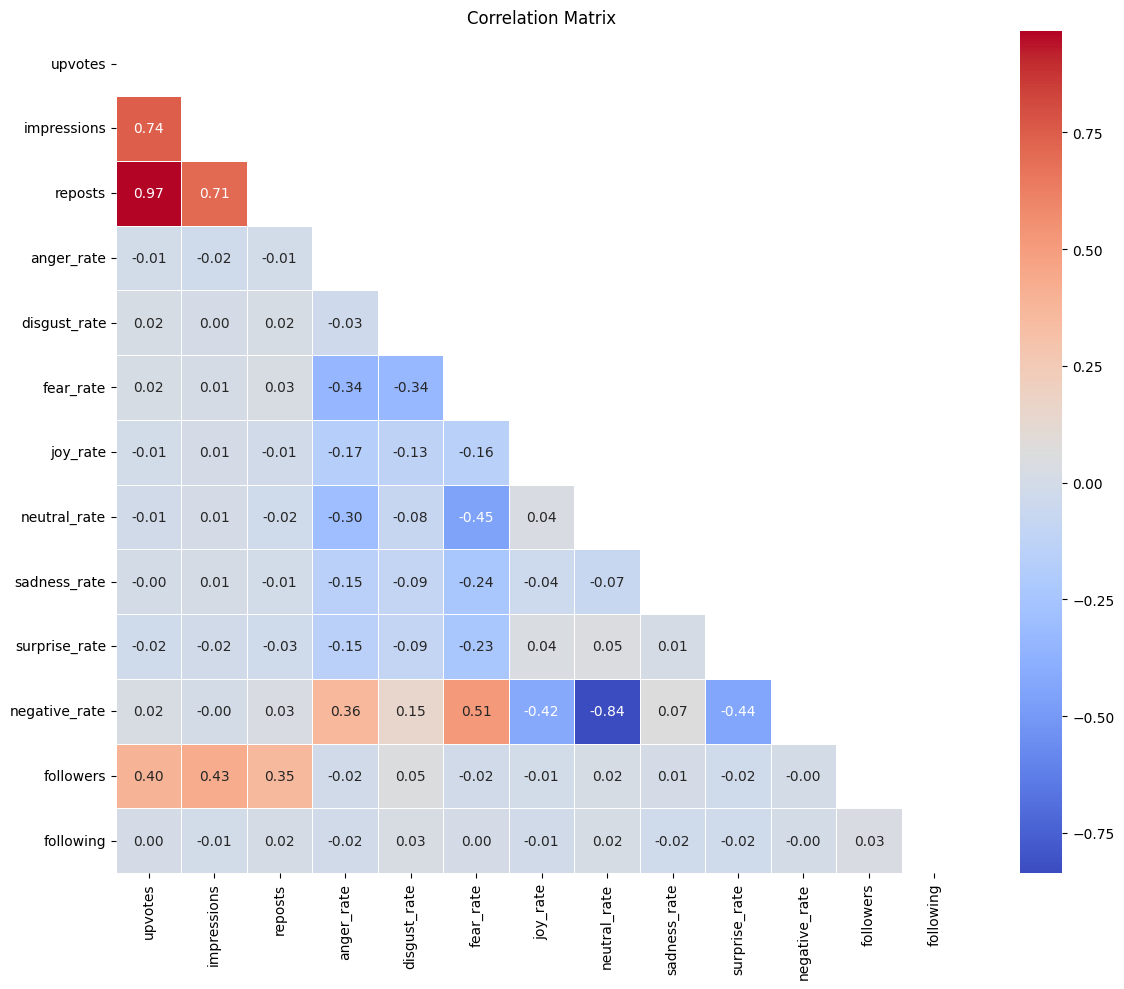

In [12]:
# Selecting relevant columns for the correlation matrix
columns_for_correlation = [
    'upvotes', 'impressions', 'reposts',
    'anger_rate', 'disgust_rate', 'fear_rate', 'joy_rate', 'neutral_rate', 'sadness_rate', 'surprise_rate',
    'negative_rate',
    'followers', 'following'
]

# Calculating the correlation matrix for the raw data
corr_matrix_raw = new_df[columns_for_correlation].corr()

# Create a mask for the upper triangle
mask_raw = np.triu(np.ones_like(corr_matrix_raw, dtype=bool))

# Creating a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_raw, mask=mask_raw, annot=True, cmap='coolwarm', fmt=".2f",  linewidths=0.5)
plt.title('Correlation Matrix')

plt.tight_layout()
plt.savefig('/home/jupyter-dowonkim/parler/img/heatmap_final.png')
plt.show()


In [ ]:
print(new_df['upvotes'].describe());
print(new_df['impressions'].describe());
print(new_df['reposts'].describe())


In [ ]:
import numpy as np

# 로그 변환 적용
new_df['upvotes_log'] = np.log1p(new_df['upvotes'])
new_df['impressions_log'] = np.log1p(new_df['impressions'])
new_df['reposts_log'] = np.log1p(new_df['reposts'])

# 로그 변환 후 종속 변수들의 요약 통계 정보 출력
print("Log-Transformed Upvotes:")
print(new_df['upvotes_log'].describe())

print("\nLog-Transformed Impressions:")
print(new_df['impressions_log'].describe())

print("\nLog-Transformed Reposts:")
print(new_df['reposts_log'].describe())


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing 'upvotes', 'impressions', and 'reposts'
scaler = MinMaxScaler()

# Assuming 'df' is the DataFrame with the columns 'upvotes', 'impressions', and 'reposts'
columns_to_normalize = ['upvotes', 'impressions', 'reposts']

# Create new columns with normalized values
for col in columns_to_normalize:
    new_col_name = f'normalized_{col}'
    df[new_col_name] = scaler.fit_transform(df[[col]])

# Now, you have both the original and normalized variables


In [ ]:
df

In [ ]:
import numpy as np
import pandas as pd

# Selecting relevant columns for the correlation matrix
columns_for_correlation = [
    'upvotes', 'impressions', 'reposts',
    'naive_bayes_polarity', 'empath_positive', 'empath_negative', 
    'anger_rate', 'disgust_rate', 'fear_rate', 'joy_rate', 'neutral_rate', 'sadness_rate', 'surprise_rate',
    'negative_rate'
]

# Create a DataFrame with the selected columns
selected_df = df[columns_for_correlation].copy()

# Adding log-transformed dependent variables and normalized variables to the DataFrame
# Assuming you have the following columns: 'log_upvotes', 'log_impressions', 'log_reposts', and
# 'normalized_upvotes', 'normalized_impressions', 'normalized_reposts'

log_columns = ['upvotes_log', 'impressions_log', 'reposts_log']
normalized_columns = ['normalized_upvotes', 'normalized_impressions', 'normalized_reposts']

# Add the log-transformed columns
selected_df[log_columns] = df[log_columns]

# Add the normalized columns
selected_df[normalized_columns] = df[normalized_columns]

# Create a figure and axis
plt.figure(figsize=(12, 10))

# Calculate the correlation matrix for the selected data
corr_matrix = selected_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Define a custom color palette (optional)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, mask=mask, linewidths=0.5)

# Set plot properties
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/home/jupyter-dowonkim/parler/img/heatmap_compare_added.png')

# Show the plot
plt.show()


In [ ]:
y_columns = ['upvotes', 'impressions', 'reposts']

# Create subplots for each dependent variable
fig, axes = plt.subplots(len(y_columns), 1, figsize=(5, 10))

for i, y_col in enumerate(y_columns):
    # Plot the density plot for the current dependent variable
    sns.histplot(new_df[f'{y_col}_log'], bins=20, color='skyblue', kde=True, ax=axes[i])
    axes[i].set_title(f'Density Plot of {y_col} (Log-Transformed)')
    axes[i].set_xlabel(f'{y_col} (Log-Transformed)')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.savefig('/home/jupyter-dowonkim/parler/img/Y_distribution.png')
plt.show()


In [ ]:

## descriptive statistics

# Selecting the specific columns for descriptive statistics
columns_of_interest = ['upvotes', 'impressions', 'reposts', 
                       'followers', 'following', 
                       'empath_positive', 'empath_negative', 'naive_bayes_polarity', 
                       'anger_rate', 'disgust_rate', 'fear_rate', 'joy_rate', 'neutral_rate', 'sadness_rate', 'surprise_rate']

# Subset the dataframe
df_subset = df[columns_of_interest]

# Generate descriptive statistics
descriptive_stats = df_subset.describe(include='all')

descriptive_stats


In [ ]:
# count zeros 
zeros_in_upvotes = (df['upvotes'] == 0).sum()
zeros_in_impressions = (df['impressions'] == 0).sum()
zeros_in_reposts = (df['reposts'] == 0).sum()

print(f"Number of zeros in 'upvotes': {zeros_in_upvotes}")
print(f"Number of zeros in 'impressions': {zeros_in_impressions}")
print(f"Number of zeros in 'reposts': {zeros_in_reposts}")


In [ ]:

# Define the emotion-related columns
emotion_columns = ['anger_rate', 'disgust_rate', 'fear_rate', 'joy_rate', 'neutral_rate', 
                   'sadness_rate', 'surprise_rate', 'negative_rate']

# Create subplots for each emotion-related column
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, column in enumerate(emotion_columns):
    # Plot the histogram for the original column
    sns.histplot(df[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(column)
    
plt.tight_layout()
plt.savefig(f"/home/jupyter-dowonkim/parler/img/histogram_emotion.png")
plt.show()


In [ ]:
# tf-idf - keyword extraction 
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import nltk

# Considering only the 'body' column for TF-IDF
corpus = df['body'].astype(str)

# Create a TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the corpus
tfidf_matrix = vectorizer.fit_transform(corpus)

# Function to extract top n keywords from a document
def extract_keywords(tfidf_matrix, feature_names, document_id, top_n=5):
    # Get the tf-idf scores for a specific document
    row = np.squeeze(tfidf_matrix[document_id].toarray())
    
    # Sort indices of tf-idf scores in descending order
    topn_ids = np.argsort(row)[::-1][:top_n]
    
    # Get top n keywords and their scores
    top_feats = [(feature_names[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats, columns=['keyword', 'tfidf'])
    return df

# Extract keywords for each document in the dataset and add them as a new column
def extract_keywords_for_all(tfidf_matrix, feature_names, top_n=5):
    keywords_list = []

    # Loop through each document
    for doc_id in range(tfidf_matrix.shape[0]):
        keywords = extract_keywords(tfidf_matrix, feature_names, doc_id, top_n)
        
        # Combine the keywords into a single string
        keywords_str = ', '.join([k for k, _ in keywords.values])
        keywords_list.append(keywords_str)

    return keywords_list

# Recreate the TF-IDF Vectorizer with built-in tokenization and stop word removal
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the corpus (without separate tokenization)
tfidf_matrix = vectorizer.fit_transform(corpus)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Extracting keywords for all documents
all_keywords = extract_keywords_for_all(tfidf_matrix, feature_names)

# Add the keywords as a new column in the dataframe
df['keywords'] = all_keywords

# Display the updated dataframe
df[['body', 'keywords']].head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# 종속 변수와 독립 변수 분리
X = new_df[['anger_rate', 'disgust_rate', 'fear_rate', 'joy_rate','sadness_rate', 'surprise_rate',
           'negative_rate']]
y_columns = ['upvotes', 'impressions', 'reposts']


# 분리된 종속 변수에 대한 변수 중요도 그래프 그리기
for column in y_columns:
    y = new_df[column]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the Random Forest Regressor
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_regressor.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = rf_regressor.predict(X_test)
    
    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error (MSE) for {column}: {mse}")
    print(f"R-squared (R2) for {column}: {r2}")
    
    # Feature Importance Plot
    importances = rf_regressor.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importances for {column}")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.savefig(f"/home/jupyter-dowonkim/parler/img/feature_importance_normalized{column}.png")
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# 종속 변수와 독립 변수 분리
X = new_df[['anger_rate', 'disgust_rate', 'fear_rate', 'joy_rate','sadness_rate', 'surprise_rate',
           'negative_rate', 'followers', 'following']]
y_columns = ['upvotes', 'impressions', 'reposts']


# 분리된 종속 변수에 대한 변수 중요도 그래프 그리기
for column in y_columns:
    y = new_df[column]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the Random Forest Regressor
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_regressor.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = rf_regressor.predict(X_test)
    
    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error (MSE) for {column}: {mse}")
    print(f"R-squared (R2) for {column}: {r2}")
    
    # Feature Importance Plot
    importances = rf_regressor.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importances for {column}")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.savefig(f"/home/jupyter-dowonkim/parler/img/feature_importance_normalized{column}.png")
    plt.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families
import matplotlib.pyplot as plt
import numpy as np

# Define the dependent variable (Y)
Y = df['upvotes']

# Define the independent variables (X) excluding non-numeric columns
numeric_columns = ['anger_rate', 'disgust_rate', 'fear_rate', 'joy_rate', 'sadness_rate', 'surprise_rate', 'negative_rate', 'followers', 'following']
X = df[numeric_columns]

# Define the ZINB model with a Negative Binomial family
zinb_model = sm.GLM(endog=Y, exog=sm.add_constant(X), family=families.NegativeBinomial())

# Fit the model
zinb_results = zinb_model.fit()

# Print the model summary
print(zinb_results.summary())

# Calculate marginal effects
coefficients = zinb_results.params[1:]  # Exclude the intercept
mean_values = X.mean()
marginal_effects = coefficients * mean_values

# Calculate confidence intervals (e.g., 95% CI)
standard_errors = zinb_results.bse[1:]
conf_int_lower = marginal_effects - 1.96 * standard_errors
conf_int_upper = marginal_effects + 1.96 * standard_errors

# Create a color map for positive and negative coefficients
colors = ['g' if c > 0 else 'r' for c in marginal_effects]

# Create a horizontal bar chart of marginal effects with 95% confidence intervals
plt.figure(figsize=(12, 8))
plt.barh(numeric_columns, marginal_effects, color=colors, alpha=0.7, label='Marginal Effect')
plt.errorbar(marginal_effects, numeric_columns, xerr=[marginal_effects - conf_int_lower, conf_int_upper - marginal_effects], fmt='none', ecolor='k', capsize=5, label='95% CI')
plt.axvline(0, color='k', linestyle='--', linewidth=0.8)  # Add a vertical line at 0
plt.xlabel('Marginal Effect Value')
plt.title("Marginal Effects Plot for 'upvotes'")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig(f"/home/jupyter-dowonkim/parler/img/marginal_effects_upvotes.png")
plt.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families
import matplotlib.pyplot as plt
import numpy as np

# Define the dependent variable (Y)
Y = df['impressions']

# Define the independent variables (X) excluding non-numeric columns
numeric_columns = ['anger_rate', 'disgust_rate', 'fear_rate', 'joy_rate', 'sadness_rate', 'surprise_rate', 'negative_rate', 'followers', 'following']
X = df[numeric_columns]

# Define the ZINB model with a Negative Binomial family
zinb_model = sm.GLM(endog=Y, exog=sm.add_constant(X), family=families.NegativeBinomial())

# Fit the model
zinb_results = zinb_model.fit()

# Print the model summary
print(zinb_results.summary())

# Calculate marginal effects
coefficients = zinb_results.params[1:]  # Exclude the intercept
mean_values = X.mean()
marginal_effects = coefficients * mean_values

# Calculate confidence intervals (e.g., 95% CI)
standard_errors = zinb_results.bse[1:]
conf_int_lower = marginal_effects - 1.96 * standard_errors
conf_int_upper = marginal_effects + 1.96 * standard_errors

# Create a color map for positive and negative coefficients
colors = ['g' if c > 0 else 'r' for c in marginal_effects]

# Create a horizontal bar chart of marginal effects with 95% confidence intervals
plt.figure(figsize=(12, 8))
plt.barh(numeric_columns, marginal_effects, color=colors, alpha=0.7, label='Marginal Effect')
plt.errorbar(marginal_effects, numeric_columns, xerr=[marginal_effects - conf_int_lower, conf_int_upper - marginal_effects], fmt='none', ecolor='k', capsize=5, label='95% CI')
plt.axvline(0, color='k', linestyle='--', linewidth=0.8)  # Add a vertical line at 0
plt.xlabel('Marginal Effect Value')
plt.title("Marginal Effects Plot for 'impressions'")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig(f"/home/jupyter-dowonkim/parler/img/marginal_effects_impressions.png")
plt.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families
import matplotlib.pyplot as plt
import numpy as np

# Define the dependent variable (Y)
Y = df['reposts']

# Define the independent variables (X) excluding non-numeric columns
numeric_columns = ['anger_rate', 'disgust_rate', 'fear_rate', 'joy_rate', 'sadness_rate', 'surprise_rate', 'negative_rate', 'followers', 'following']
X = df[numeric_columns]

# Define the ZINB model with a Negative Binomial family
zinb_model = sm.GLM(endog=Y, exog=sm.add_constant(X), family=families.NegativeBinomial())

# Fit the model
zinb_results = zinb_model.fit()

# Print the model summary
print(zinb_results.summary())

# Calculate marginal effects
coefficients = zinb_results.params[1:]  # Exclude the intercept
mean_values = X.mean()
marginal_effects = coefficients * mean_values

# Calculate confidence intervals (e.g., 95% CI)
standard_errors = zinb_results.bse[1:]
conf_int_lower = marginal_effects - 1.96 * standard_errors
conf_int_upper = marginal_effects + 1.96 * standard_errors

# Create a color map for positive and negative coefficients
colors = ['g' if c > 0 else 'r' for c in marginal_effects]

# Create a horizontal bar chart of marginal effects with 95% confidence intervals
plt.figure(figsize=(12, 8))
plt.barh(numeric_columns, marginal_effects, color=colors, alpha=0.7, label='Marginal Effect')
plt.errorbar(marginal_effects, numeric_columns, xerr=[marginal_effects - conf_int_lower, conf_int_upper - marginal_effects], fmt='none', ecolor='k', capsize=5, label='95% CI')
plt.axvline(0, color='k', linestyle='--', linewidth=0.8)  # Add a vertical line at 0
plt.xlabel('Marginal Effect Value')
plt.title("Marginal Effects Plot for 'reposts'")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig(f"/home/jupyter-dowonkim/parler/img/marginal_effects_reposts.png")
plt.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families
import matplotlib.pyplot as plt
import numpy as np

# Define the dependent variable (Y)
Y = df['upvotes']

# Define the independent variables (X) excluding non-numeric columns
numeric_columns = ['anger_rate', 'disgust_rate', 'fear_rate', 'joy_rate', 'sadness_rate', 'surprise_rate', 'negative_rate']
X = df[numeric_columns]

# Define the ZINB model with a Negative Binomial family
zinb_model = sm.GLM(endog=Y, exog=sm.add_constant(X), family=families.NegativeBinomial())

# Fit the model
zinb_results = zinb_model.fit()

# Print the model summary
print(zinb_results.summary())

# Calculate marginal effects
coefficients = zinb_results.params[1:]  # Exclude the intercept
mean_values = X.mean()
marginal_effects = coefficients * mean_values

# Calculate confidence intervals (e.g., 95% CI)
standard_errors = zinb_results.bse[1:]
conf_int_lower = marginal_effects - 1.96 * standard_errors
conf_int_upper = marginal_effects + 1.96 * standard_errors

# Create a color map for positive and negative coefficients
colors = ['g' if c > 0 else 'r' for c in marginal_effects]

# Create a horizontal bar chart of marginal effects with 95% confidence intervals
plt.figure(figsize=(12, 8))
plt.barh(numeric_columns, marginal_effects, color=colors, alpha=0.7, label='Marginal Effect')
plt.errorbar(marginal_effects, numeric_columns, xerr=[marginal_effects - conf_int_lower, conf_int_upper - marginal_effects], fmt='none', ecolor='k', capsize=5, label='95% CI')
plt.axvline(0, color='k', linestyle='--', linewidth=0.8)  # Add a vertical line at 0
plt.xlabel('Marginal Effect Value')
plt.title("Marginal Effects Plot for 'upvotes'")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig(f"/home/jupyter-dowonkim/parler/img/marginal_effects_upvotes_2.png")
plt.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families
import matplotlib.pyplot as plt
import numpy as np

# Define the dependent variable (Y)
Y = df['impressions']

# Define the independent variables (X) excluding non-numeric columns
numeric_columns = ['anger_rate', 'disgust_rate', 'fear_rate', 'joy_rate', 'sadness_rate', 'surprise_rate', 'negative_rate']
X = df[numeric_columns]

# Define the ZINB model with a Negative Binomial family
zinb_model = sm.GLM(endog=Y, exog=sm.add_constant(X), family=families.NegativeBinomial())

# Fit the model
zinb_results = zinb_model.fit()

# Print the model summary
print(zinb_results.summary())

# Calculate marginal effects
coefficients = zinb_results.params[1:]  # Exclude the intercept
mean_values = X.mean()
marginal_effects = coefficients * mean_values

# Calculate confidence intervals (e.g., 95% CI)
standard_errors = zinb_results.bse[1:]
conf_int_lower = marginal_effects - 1.96 * standard_errors
conf_int_upper = marginal_effects + 1.96 * standard_errors

# Create a color map for positive and negative coefficients
colors = ['g' if c > 0 else 'r' for c in marginal_effects]

# Create a horizontal bar chart of marginal effects with 95% confidence intervals
plt.figure(figsize=(12, 8))
plt.barh(numeric_columns, marginal_effects, color=colors, alpha=0.7, label='Marginal Effect')
plt.errorbar(marginal_effects, numeric_columns, xerr=[marginal_effects - conf_int_lower, conf_int_upper - marginal_effects], fmt='none', ecolor='k', capsize=5, label='95% CI')
plt.axvline(0, color='k', linestyle='--', linewidth=0.8)  # Add a vertical line at 0
plt.xlabel('Marginal Effect Value')
plt.title("Marginal Effects Plot for 'impressions'")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig(f"/home/jupyter-dowonkim/parler/img/marginal_effects_impressions_2.png")
plt.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.genmod import families
import matplotlib.pyplot as plt
import numpy as np

# Define the dependent variable (Y)
Y = df['reposts']

# Define the independent variables (X) excluding non-numeric columns
numeric_columns = ['anger_rate', 'disgust_rate', 'fear_rate', 'joy_rate', 'sadness_rate', 'surprise_rate', 'negative_rate']
X = df[numeric_columns]

# Define the ZINB model with a Negative Binomial family
zinb_model = sm.GLM(endog=Y, exog=sm.add_constant(X), family=families.NegativeBinomial())

# Fit the model
zinb_results = zinb_model.fit()

# Print the model summary
print(zinb_results.summary())

# Calculate marginal effects
coefficients = zinb_results.params[1:]  # Exclude the intercept
mean_values = X.mean()
marginal_effects = coefficients * mean_values

# Calculate confidence intervals (e.g., 95% CI)
standard_errors = zinb_results.bse[1:]
conf_int_lower = marginal_effects - 1.96 * standard_errors
conf_int_upper = marginal_effects + 1.96 * standard_errors

# Create a color map for positive and negative coefficients
colors = ['g' if c > 0 else 'r' for c in marginal_effects]

# Create a horizontal bar chart of marginal effects with 95% confidence intervals
plt.figure(figsize=(12, 8))
plt.barh(numeric_columns, marginal_effects, color=colors, alpha=0.7, label='Marginal Effect')
plt.errorbar(marginal_effects, numeric_columns, xerr=[marginal_effects - conf_int_lower, conf_int_upper - marginal_effects], fmt='none', ecolor='k', capsize=5, label='95% CI')
plt.axvline(0, color='k', linestyle='--', linewidth=0.8)  # Add a vertical line at 0
plt.xlabel('Marginal Effect Value')
plt.title("Marginal Effects Plot for 'reposts'")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig(f"/home/jupyter-dowonkim/parler/img/marginal_effects_reposts_2.png")
plt.show()
